## Curve Fitting Activity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# import dataset
df = pd.read_excel('measurements.xlsx')
df.head()

,Num,Oblique body length (cm),Withers height(cm),Heart girth(cm),Hip length (cm),Body weight (kg)
0,1,161,124,190,47,545
1,2,152,120,183,43,507
2,3,151,124,179,41,450
3,4,174,129,202,50,604
4,5,128,114,176,41,448


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Num                       72 non-null     int64
 1   Oblique body length (cm)  72 non-null     int64
 2   Withers height(cm)        72 non-null     int64
 3   Heart girth(cm)           72 non-null     int64
 4   Hip length (cm)           72 non-null     int64
 5   Body weight (kg)          72 non-null     int64
dtypes: int64(6)
memory usage: 3.5 KB


Dataset description:

In [4]:
# filter data to OBL, HG, and BW
data = df[['Oblique body length (cm)', 
           'Heart girth(cm)',
           'Body weight (kg)']]
data.columns = ['OBL', 'HG', 'BW']
data = data.sort_values(by=['OBL', 'HG'], ascending=True).reset_index()[['OBL', 'HG', 'BW']]
data

,OBL,HG,BW
0,127,171,409
1,128,176,448
2,138,168,371
3,138,173,362
4,138,173,367
...,...,...,...
67,171,204,617
68,171,204,617
69,173,200,610
70,174,202,604


In [5]:
# split the data into training and test sets
n_train = math.ceil(data.shape[0] * 0.80)
n_test = data.shape[0] - n_train

train_data = data[:n_train]
test_data = data[-n_test:]

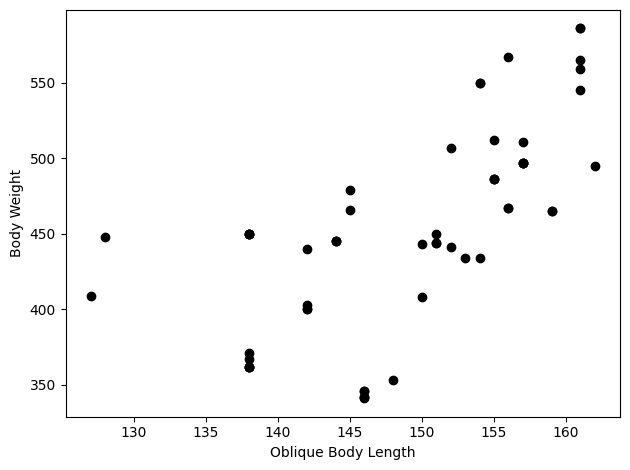

In [6]:
# data plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x=train_data['OBL'], y=train_data['BW'], c='k')

# ax.set_xlim([120,170])
# ax.set_ylim([300,650])
ax.set_xlabel('Oblique Body Length')
ax.set_ylabel('Body Weight')

plt.tight_layout()
plt.show()

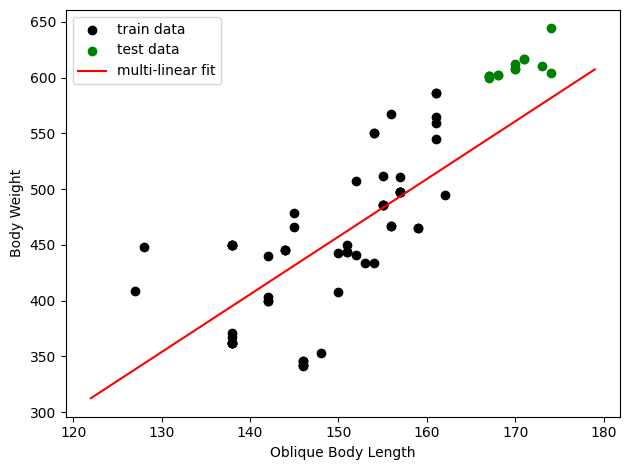

In [7]:
# fit a linear regression line
# plot using excel coefficient results

coeffs = [5.172994934, -318.6459451]
X = np.linspace(data['OBL'].min()-5, data['OBL'].max()+5, 100)
Y =coeffs[0] * X + coeffs[1]

# train data
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(train_data['OBL'], train_data['BW'], c='k', label='train data')

# test data
ax.scatter(test_data['OBL'], test_data['BW'], c='g', label='test data')

# fitted line
ax.plot(X, Y, c='r', label='multi-linear fit')

ax.set_xlabel('Oblique Body Length')
ax.set_ylabel('Body Weight')

plt.legend()
plt.tight_layout()
plt.show()


### Using Packages to Compute for Regression Curves

In [105]:
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats

x_label = 'OBL'  # or 'HG'

#--------- fitting regression curves (different ways)

# Linear Regression (y = ax+b)
a1, b1, _, _, _ = stats.linregress(train_data[x_label], train_data['BW'])
linear = np.poly1d([a1, b1])

# Quadratic Regression (y = ax^2+bx+c)
quad = np.poly1d(np.polyfit(train_data[x_label], train_data['BW'], deg=2))

# Cubic Regression (y = ax^3+bx^2+cx+d)
def cubic(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d
params, _ = curve_fit(cubic, train_data[x_label], train_data['BW'])

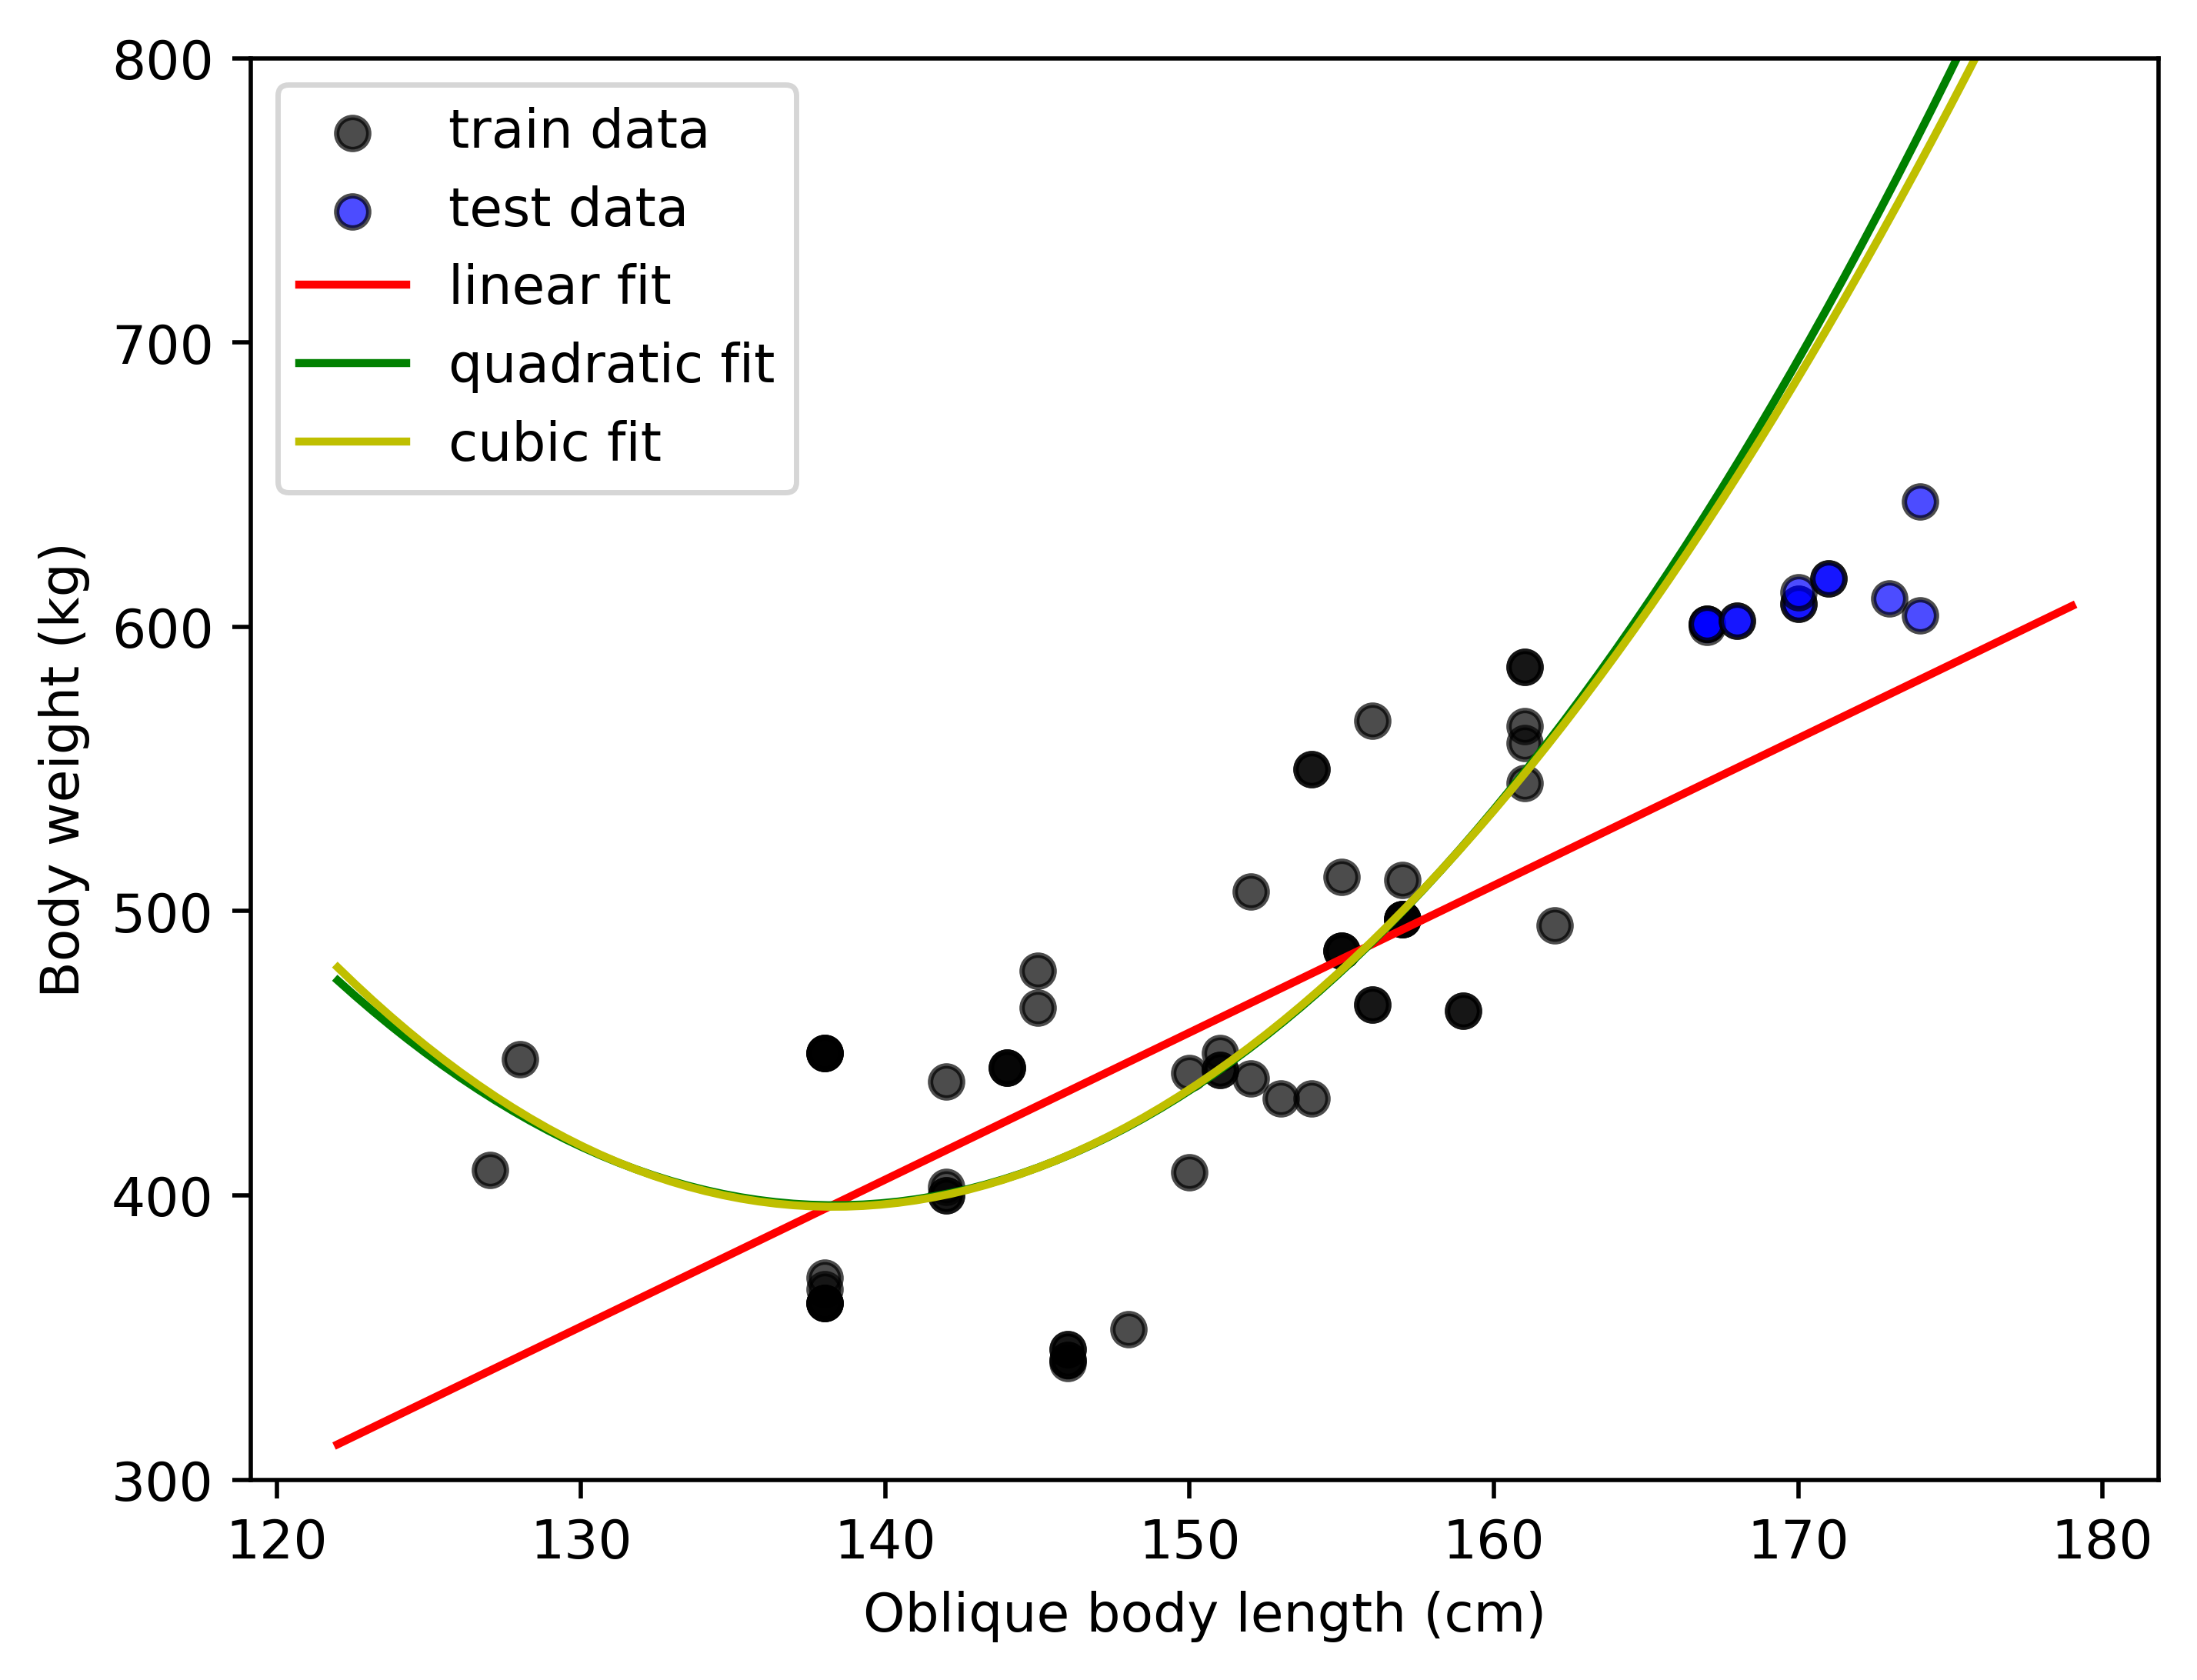

In [156]:
# plotting regression curves and data
plt.rcParams['scatter.edgecolors'] = 'black'
plt.rcParams['markers.fillstyle'] = 'full'
plt.rcParams['figure.dpi'] = 500

X = np.linspace(data[x_label].min()-5, data[x_label].max()+5, 100)

# train data
plt.scatter(train_data[x_label], train_data['BW'], 
            c='k', alpha=0.7, label='train data')
# test data
plt.scatter(test_data[x_label], test_data['BW'], 
            c='b', alpha=0.7, label='test data')

# regression curves
plt.plot(X, linear(X), c='r', label='linear fit')
plt.plot(X, quad(X), c='g', label='quadratic fit')
plt.plot(X, cubic(X, *params), c='y', label='cubic fit')

plt.ylim([300,800])

plt.xlabel('Oblique body length (cm)' if x_label=='OBL' else 'Heart girth (cm)')
plt.ylabel('Body weight (kg)')
plt.legend()
plt.show()

In [109]:
def get_residuals(X:pd.DataFrame, Y:pd.DataFrame, fitted_curve, params=None):
    if params is not None:
        Y_pred = fitted_curve(X.to_numpy(), *params)
    else:
        Y_pred = fitted_curve(X)
    
    return Y.to_numpy() - Y_pred

# training data residuals
linear_res = get_residuals(train_data[x_label], train_data['BW'], fitted_curve=linear)
quad_res = get_residuals(train_data[x_label], train_data['BW'], fitted_curve=quad)
cubic_res = get_residuals(train_data[x_label], train_data['BW'], fitted_curve=cubic, params=params)

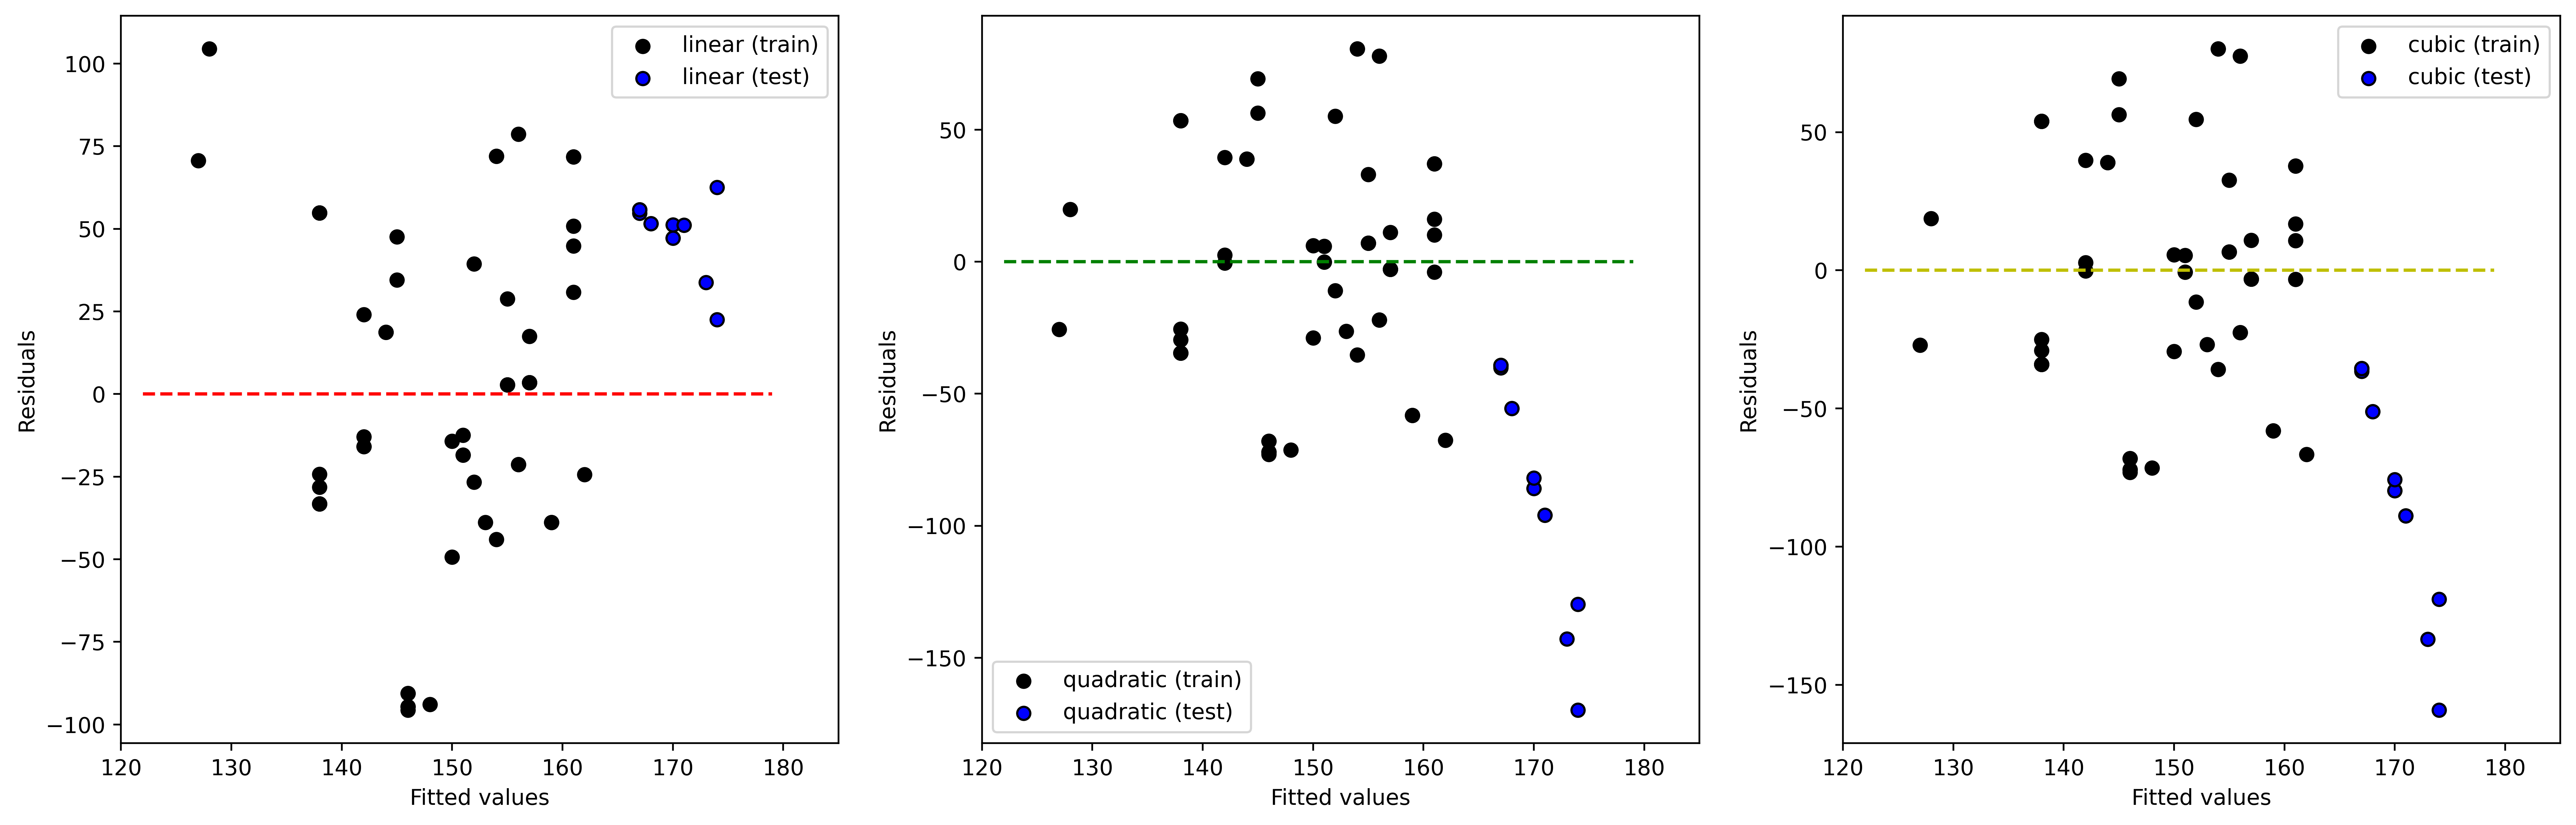

In [155]:
# residuals plot

X = np.linspace(data[x_label].min()-5, data[x_label].max()+5, 100)

fig, axs = plt.subplots(1,3, figsize=(20,6))
axs = axs.flatten()

# ------- Residual (Linear curve)
axs[0].plot(X, np.full_like(X, 0), '--', c='r')
axs[0].scatter(train_data[x_label], get_residuals(train_data[x_label], train_data['BW'], linear),
            c='k', label='linear (train)')
axs[0].scatter(test_data[x_label], get_residuals(test_data[x_label], test_data['BW'], linear),
            c='b', label='linear (test)')

axs[0].set_xlim([120, 185])
axs[0].set_xlabel('Fitted values')
axs[0].set_ylabel('Residuals')
axs[0].legend()


# ------- Residual (Quadratic curve)
axs[1].plot(X, np.full_like(X, 0), '--', c='g')
axs[1].scatter(train_data[x_label], get_residuals(train_data[x_label], train_data['BW'], quad),
            c='k', label='quadratic (train)')
axs[1].scatter(test_data[x_label], get_residuals(test_data[x_label], test_data['BW'], quad),
            c='b', label='quadratic (test)')

axs[1].set_xlim([120, 185])
axs[1].set_xlabel('Fitted values')
axs[1].set_ylabel('Residuals')
axs[1].legend(loc='lower left')


# ------- Residual (Quadratic curve)
axs[2].plot(X, np.full_like(X, 0), '--', c='y')
axs[2].scatter(train_data[x_label], get_residuals(train_data[x_label], train_data['BW'], cubic, params),
            c='k', label='cubic (train)')
axs[2].scatter(test_data[x_label], get_residuals(test_data[x_label], test_data['BW'], cubic, params),
            c='b', label='cubic (test)')

axs[2].set_xlim([120, 185])
axs[2].set_xlabel('Fitted values')
axs[2].set_ylabel('Residuals')
axs[2].legend()

plt.show()

In [ ]:
# computing goodness of fit
# RMSE, R^2, AIC

def rmse(predicted, actual):
    """ Computes for Root Mean Square Error """
    return np.sqrt(((predicted-actual)**2).mean())


def AIC(predicted, actual, fitted_curve, params=None):
    """ 
    Computes for Akaike Information Criterion (AIC) using

    AIC = n * ln(RSS/n) + 2k where
    n: number of data points
    RSS: residual sum of squares
    k: number of parameters of model

    The lower the AIC, the better the model.
    """

    if params is not None:
        k = len(params)
    else:
        k = len(fitted_curve)
    
    n = len(actual)

    residuals = get_residuals(predicted, actual, fitted_curve, params)
    RSS = (residuals**2).sum()

    return n * np.log(RSS/n) + 2*k

In [173]:
AIC(linear(train_data['OBL']), train_data['BW'], linear)

np.float64(856.1053813286403)

In [174]:
AIC(quad(train_data['OBL']), train_data['BW'], quad)

np.float64(1204.9445476133433)

In [179]:
AIC(cubic(train_data['OBL'], *params), train_data['BW'], cubic, params)

np.float64(1099.9867495198807)